In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from environments.observation_domains import estimate_domains

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def render(physics, camera='fixed'):
    img = physics.render(camera_id=camera, height=800, width=800)
    plt.figure(figsize = (10,10))
    plt.imshow(img)

TimeStep(step_type=<StepType.FIRST: 0>, reward=None, discount=None, observation=OrderedDict([('position', array([-3.8,  0. ]))]))


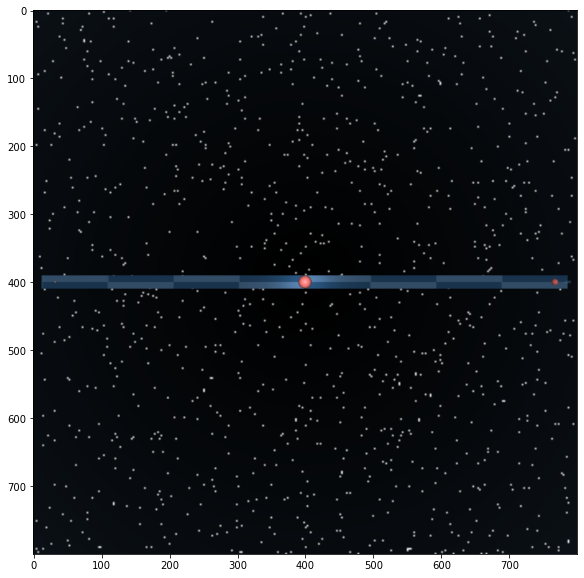

In [4]:
%run environments/hallway.py
env = suite.load('hallway', 'velocity_4')
env.reset()
render(env.physics)

In [11]:
estimate_domains('hallway', 'velocity_4')

(OrderedDict([('position',
               DeviceArray([-4.08      , -0.17999989], dtype=float32))]),
 OrderedDict([('position',
               DeviceArray([-1.82      ,  0.17999989], dtype=float32))]))

In [6]:
physics = env.physics

In [7]:
physics.named.model.geom_pos

FieldIndexer(geom_pos):
               x         y         z         
0     ground [ 0         0         0       ]
1     wall_x [-4         0         0.02    ]
2     wall_y [ 0        -0.1       0.02    ]
3 wall_neg_x [ 4         0         0.02    ]
4 wall_neg_y [ 0         0.1       0.02    ]
5 distractor [ 0         0         0.01    ]
6     target [ 3.8       0         0.01    ]
7  pointmass [ 0         0         0       ]

In [8]:
physics.named.model.jnt_range

FieldIndexer(jnt_range):
0 root_x [-4         4       ]
1 root_y [-0.1       0.1     ]

In [9]:
with physics.reset_context():
    physics.named.model.geom_pos['wall_x'][0] = -1
    physics.named.model.geom_pos['wall_neg_x'][0] = 1

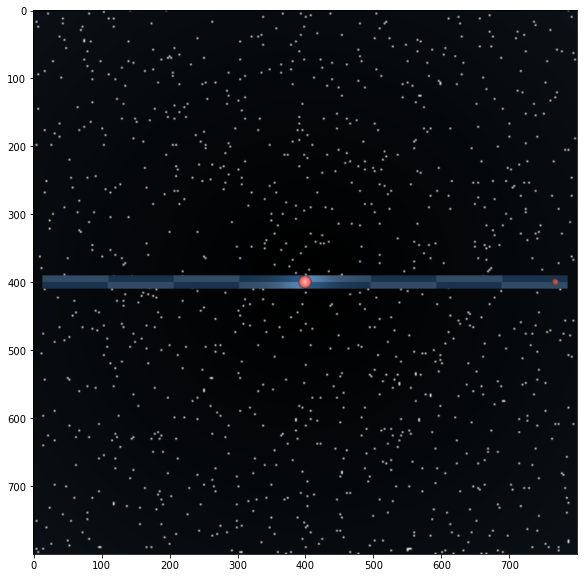

In [10]:
render(physics, camera='fixed')